In [38]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_colwidth", 200)

In [49]:

conn = psycopg2.connect(host="localhost",database="mimic", user="postgres", password='postgres', port = '5432')
cursor = conn.cursor()

In [50]:
sql = """
SELECT *
  FROM mimiciii.fluid_mv_dailytotal
  """
dfmv = pd.read_sql_query(sql, conn)

In [51]:
dfmv.head()

,subject_id,hadm_id,icustay_id,chartdate,dailytotal_ml
0,55973,152234,200001.0,2181-11-25,1.083335
1,55973,152234,200001.0,2181-11-26,687.399985
2,55973,152234,200001.0,2181-11-27,681.306595
3,11861,192256,200010.0,2132-08-05,3029.513896
4,74032,117458,200016.0,2150-12-02,578.947354


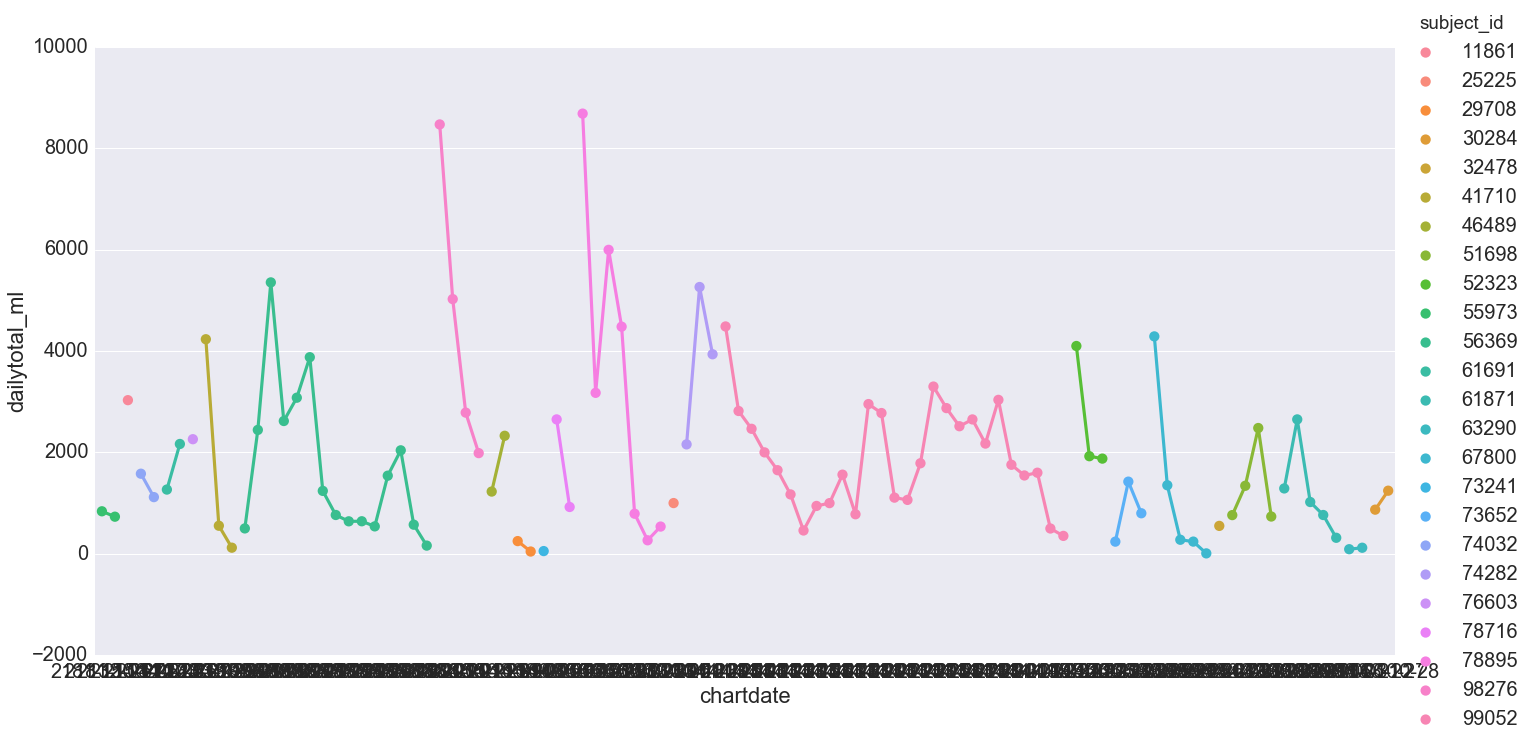

In [24]:
sns.set(font_scale=2)
sns.factorplot(x="chartdate", y="dailytotal_ml", hue="subject_id", data=dfmv.loc[1:100, :], legend='False', size=10, aspect = 2)

In [42]:
sql = """
SELECT *
  FROM mimiciii.fluid_cv_dailytotal
  """
dfcv = pd.read_sql_query(sql, conn)

In [43]:
dfcv.head()

,subject_id,hadm_id,icustay_id,chartdate,dailytotal_ml
0,3,145834.0,211552.0,2101-10-21,13807.5
1,3,145834.0,211552.0,2101-10-22,1240.0
2,3,145834.0,211552.0,2101-10-23,500.0
3,3,145834.0,211552.0,2101-10-24,480.0
4,3,145834.0,211552.0,2101-10-25,460.0


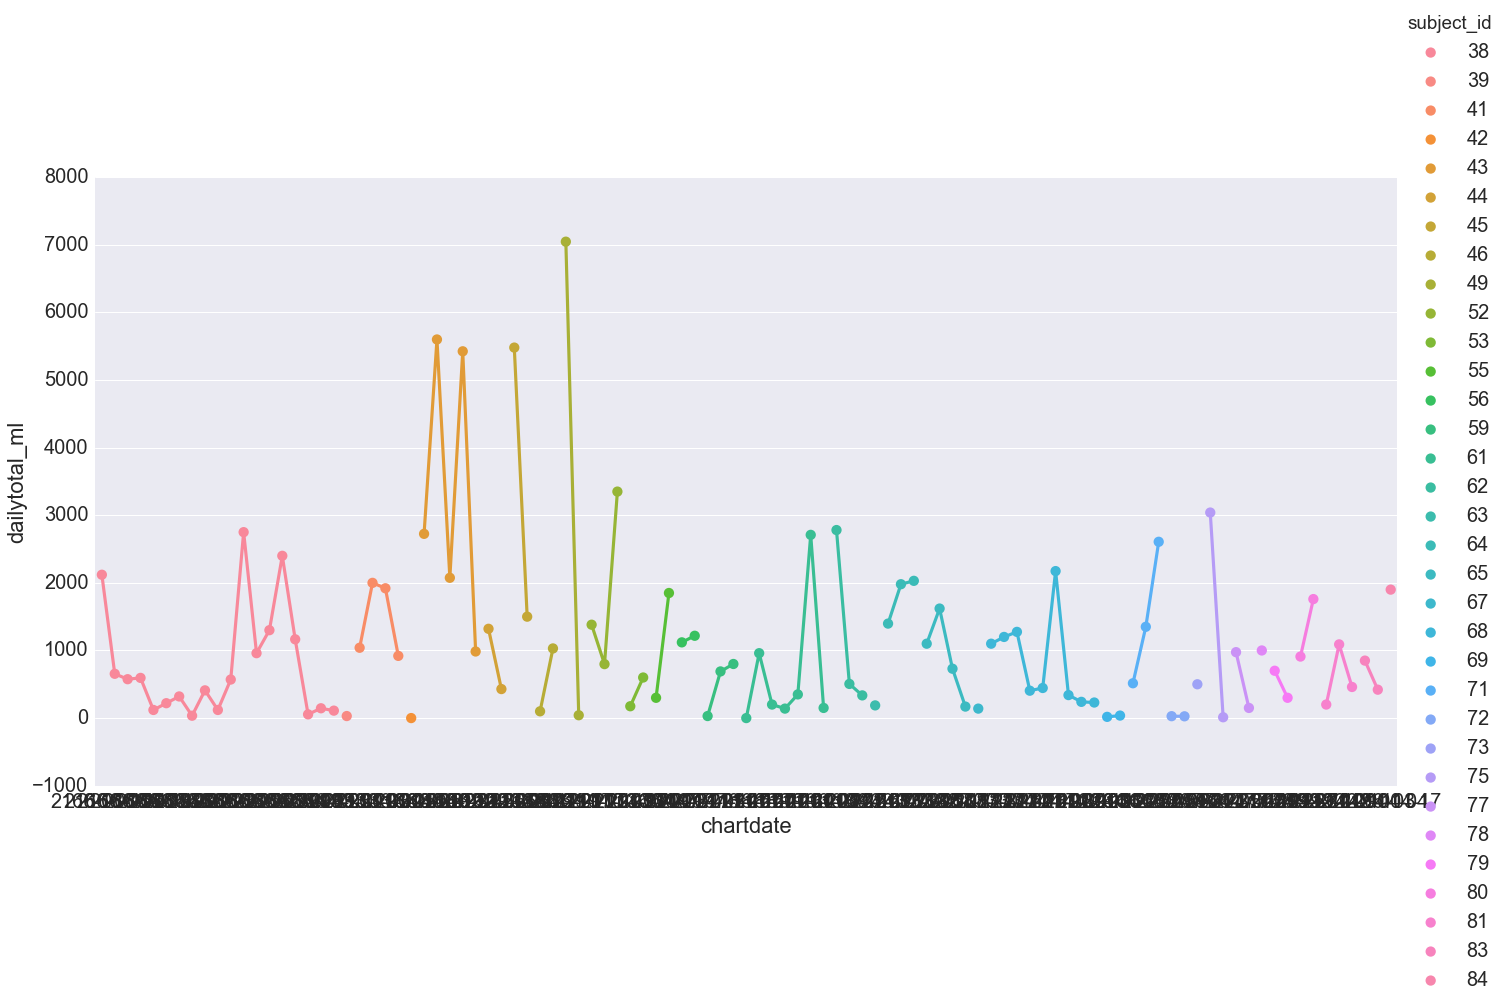

In [31]:
sns.set(font_scale=2)
sns.factorplot(x="chartdate", y="dailytotal_ml", hue="subject_id", data=dfcv.loc[100:200, :], legend='False', size=10, aspect = 2)

In [52]:
dfmv['dailytotal_ml'].describe()
print dfmv.dailytotal_ml.max()
print dfmv.dailytotal_ml.min()

27930.8560548
0.0


In [45]:
dfcv['dailytotal_ml'].describe()
print dfcv.dailytotal_ml.max()
print dfcv.dailytotal_ml.min()

71144.5
0.0


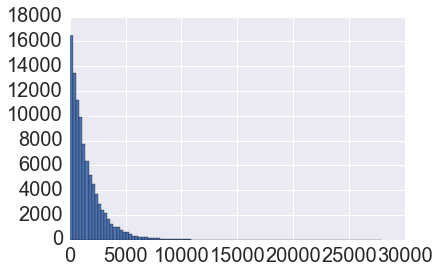

In [53]:
axes = dfmv.dailytotal_ml.hist(bins=100)
#axes.set_ylim((0,10))
#axes.set_xlim((-21000, 1002200))

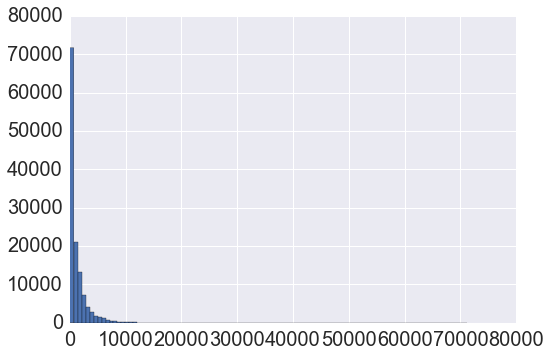

In [35]:
axes = dfcv.dailytotal_ml.hist(bins=100)

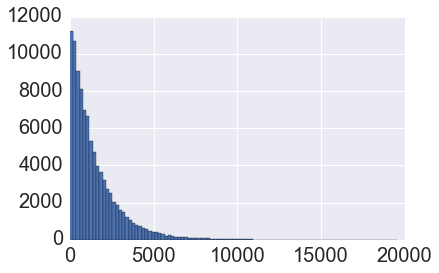

In [54]:
#df['dailytotal_ml'<20000].hist(bins= 100)
dfmv[(dfmv['dailytotal_ml'] <20000) & (dfmv['dailytotal_ml']> 0)].dailytotal_ml.hist(bins=100)

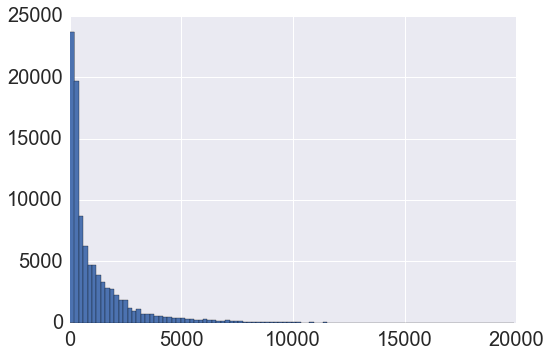

In [36]:
dfcv[(dfcv['dailytotal_ml'] <20000) & (dfmv['dailytotal_ml']> 0)].dailytotal_ml.hist(bins=100)

In [55]:
sql = """
SELECT *
  FROM mimiciii.output_dailytotal
  """
dfout = pd.read_sql_query(sql, conn)

In [58]:
print dfout.dailytotal_ml.max()
print dfout.dailytotal_ml.min()

4556535.0
0.0


(0, 10)

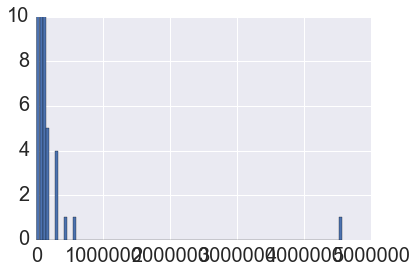

In [60]:
axes = dfout.dailytotal_ml.hist(bins=100)
axes.set_ylim((0,10))

In [17]:
sql = """
SELECT *
  FROM mimiciii.apsiii
  """
dfapache = pd.read_sql_query(sql, conn)

In [21]:
# apache score III calculatd using existing code in mimic_code.
dfapache.head()

,subject_id,hadm_id,icustay_id,apsiii,apsiii_prob,hr_score,meanbp_score,temp_score,resprate_score,pao2_aado2_score,...,wbc_score,creatinine_score,uo_score,bun_score,sodium_score,albumin_score,bilirubin_score,glucose_score,acidbase_score,gcs_score
0,55973,152234,200001,63,0.188678,7.0,7.0,0.0,6.0,0.0,...,5.0,7.0,15.0,12.0,0.0,NaN,0.0,0.0,1.0,0.0
1,27513,163557,200003,48,0.102705,7.0,10.0,0.0,9.0,NaN,...,5.0,0.0,0.0,7.0,0.0,0.0,6.0,0.0,1.0,0.0
2,10950,189514,200006,23,0.033927,0.0,7.0,0.0,6.0,NaN,...,0.0,0.0,4.0,0.0,0.0,NaN,NaN,3.0,NaN,0.0
3,20707,129310,200007,33,0.053332,1.0,15.0,0.0,6.0,NaN,...,0.0,0.0,5.0,0.0,0.0,0.0,NaN,3.0,NaN,0.0
4,29904,129607,200009,26,0.038894,1.0,7.0,8.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,NaN,NaN,0.0,3.0,0.0


In [26]:
dfapache.columns

Index([u'subject_id', u'hadm_id', u'icustay_id', u'apsiii', u'apsiii_prob',
       u'hr_score', u'meanbp_score', u'temp_score', u'resprate_score',
       u'pao2_aado2_score', u'hematocrit_score', u'wbc_score',
       u'creatinine_score', u'uo_score', u'bun_score', u'sodium_score',
       u'albumin_score', u'bilirubin_score', u'glucose_score',
       u'acidbase_score', u'gcs_score'],
      dtype='object')

In [37]:
#pattern = re.compile("Date/Time[\0-\377[:nonascii:]]*?the patient\t")
#pattern = re.compile("Date/Time[\0-\377[:nonascii:]]*?the patient\t", re.DOTALL)
pattern = re.compile("Date((?:.|\n)*?)the patient\t", re.DOTALL)

for i, line in enumerate(open('C:/Users/310050083/Documents/MIMICcourse/Project/echoreports/Echos_2016-05-13-02-42-25-011645_mx.txt')):
    for match in re.finditer(pattern, line):
        print 'Found on line %s: %s' % (i+1, match.groups())

In [ ]:
# explore fluid input and echo
sql = """
SELECT *
  FROM mimiciii.test_echo_fluid
  """
df = pd.read_sql_query(sql, conn)